In [1]:
import numpy as np
import scipy

import pandas as pd
import re

# Task 1

In [2]:
# 1. Download dataset
data = pd.read_csv('C:/_Coursera/week2/sentences.txt', sep = '\n',header = None)

In [3]:
# 2. Lowercase
data.columns = ['sentence']
data.sentence = data.sentence.str.lower()
data.head()

,sentence
0,"in comparison to dogs, cats have not undergone..."
1,"as cat simply catenates streams of bytes, it c..."
2,a common interactive use of cat for a single f...
3,cats can hear sounds too faint or too high in ...
4,"in one, people deliberately tamed cats in a pr..."


In [4]:
# 3. Tokenization
data["tokens"] = data.sentence.apply( lambda x: re.split('[^a-z]', x))
data.head()

,sentence,tokens
0,"in comparison to dogs, cats have not undergone...","[in, comparison, to, dogs, , cats, have, not, ..."
1,"as cat simply catenates streams of bytes, it c...","[as, cat, simply, catenates, streams, of, byte..."
2,a common interactive use of cat for a single f...,"[a, common, interactive, use, of, cat, for, a,..."
3,cats can hear sounds too faint or too high in ...,"[cats, can, hear, sounds, too, faint, or, too,..."
4,"in one, people deliberately tamed cats in a pr...","[in, one, , people, deliberately, tamed, cats,..."


In [5]:
for i in range(len(data.tokens)):
    while("" in data.tokens[i]) : 
        data.tokens[i].remove("")
data.head()

,sentence,tokens
0,"in comparison to dogs, cats have not undergone...","[in, comparison, to, dogs, cats, have, not, un..."
1,"as cat simply catenates streams of bytes, it c...","[as, cat, simply, catenates, streams, of, byte..."
2,a common interactive use of cat for a single f...,"[a, common, interactive, use, of, cat, for, a,..."
3,cats can hear sounds too faint or too high in ...,"[cats, can, hear, sounds, too, faint, or, too,..."
4,"in one, people deliberately tamed cats in a pr...","[in, one, people, deliberately, tamed, cats, i..."


In [6]:
word_dict = {}

In [7]:
i = 0
for wlist in data.tokens:
    for word in wlist:
        if word not in word_dict.values():
            word_dict[i] = word
            i += 1

In [8]:
df_words = np.zeros( (len(data.tokens), len(word_dict) ) )

In [9]:
for i in range(len(data.tokens)):
    for j in range (len(word_dict)):
        df_words[i,j] = data.tokens[i].count(word_dict[j])

In [10]:
df_words

array([[1., 1., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 2., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 1., 1.]])

In [11]:
from scipy.spatial import distance

dist_to_first = {}
for i in range (1, len(data.tokens)):
    dist_to_first[i] = distance.cosine(df_words[0], df_words[i])

In [12]:
sorted_dict = sorted(dist_to_first.items(), key=lambda x: x[1])
sorted_dict

[(6, 0.7327387580875756),
 (4, 0.7770887149698589),
 (21, 0.8250364469440588),
 (10, 0.8328165362273942),
 (12, 0.8396432548525454),
 (16, 0.8406361854220809),
 (20, 0.8427572744917122),
 (2, 0.8644738145642124),
 (13, 0.8703592552895671),
 (14, 0.8740118423302576),
 (11, 0.8804771390665607),
 (8, 0.8842724875284311),
 (19, 0.8885443574849294),
 (3, 0.8951715163278082),
 (9, 0.9055088817476932),
 (7, 0.9258750683338899),
 (5, 0.9402385695332803),
 (15, 0.9442721787424647),
 (18, 0.9442721787424647),
 (1, 0.9527544408738466),
 (17, 0.956644501523794)]

In [13]:
file = open("C:/_Coursera/week2/task1.txt","w")
for i in range (2):
    file.write(str(sorted_dict[i][0]).rstrip('\n') + ' ' )
file.close()

Расстояние довольно большое -- тематика не близкая.
Но можем предположить, что строки с индексами 4 и 6 имеют схожую с первой строкой тематику, выведем их

In [14]:
print(data.sentence[0])
print(data.sentence[4])
print(data.sentence[6])

in comparison to dogs, cats have not undergone major changes during the domestication process.
in one, people deliberately tamed cats in a process of artificial selection, as they were useful predators of vermin.
domestic cats are similar in size to the other members of the genus felis, typically weighing between 4 and 5 kg (8.8 and 11.0 lb).


# Task 2

In [15]:
def func(x): 
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

In [16]:
from scipy import linalg 

In [17]:
A =  np.array([[1, 1],
     [1, 15]])

b = [func(1), func(15)]
w = linalg.solve(A, b)
w

array([ 3.43914511, -0.18692825])

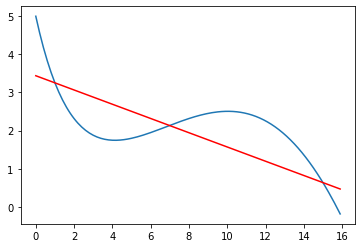

In [18]:
from matplotlib import pylab as plt
x = np.arange(0,16, 0.1)
y = func(x)
plt.plot(x,y)

y_pred = w[0] + w[1]*x 
plt.plot(x,y_pred, color = 'red')
plt.show()

In [19]:
A =  np.array([[1, 1, 1],
    [1, 8, 8**2],
    [1, 15, 15**2]])

b = [func(1), func(8), func(15)]
w = linalg.solve(A, b)
w

array([ 3.32512949, -0.06531159, -0.00760104])

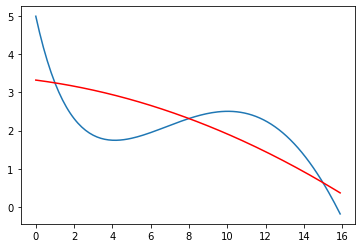

In [20]:
from matplotlib import pylab as plt
x = np.arange(0,16, 0.1)
y = func(x)
plt.plot(x,y)

y_pred = w[0] + w[1]*x + w[2]*x**2
plt.plot(x,y_pred, color = 'red')
plt.show()

In [21]:
A =  np.array([[1, 1, 1, 1],
    [1, 4, 4**2, 4**3],
    [1, 10, 10**2, 10**3],
    [1, 15, 15**2, 15**3]])

b = [func(1), func(4), func(10), func(15)]
w = linalg.solve(A, b)
w

array([ 4.36264154, -1.29552587,  0.19333685, -0.00823565])

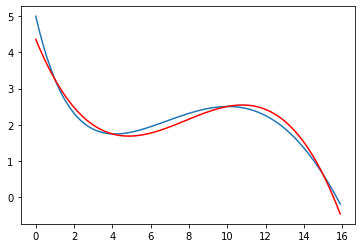

In [22]:
from matplotlib import pylab as plt
x = np.arange(0,16, 0.1)
y = func(x)
plt.plot(x,y)

y_pred = w[0] + w[1]*x + w[2]*x**2 + w[3]* x**3
plt.plot(x,y_pred, color = 'red')
plt.show()

In [23]:
file = open("C:/_Coursera/week2/task2.txt","w")
for i in range (4):
    file.write(str(w[i]).rstrip('\n') + ' ' )
file.close()